# Bayesian Gaussian Mixture Models:

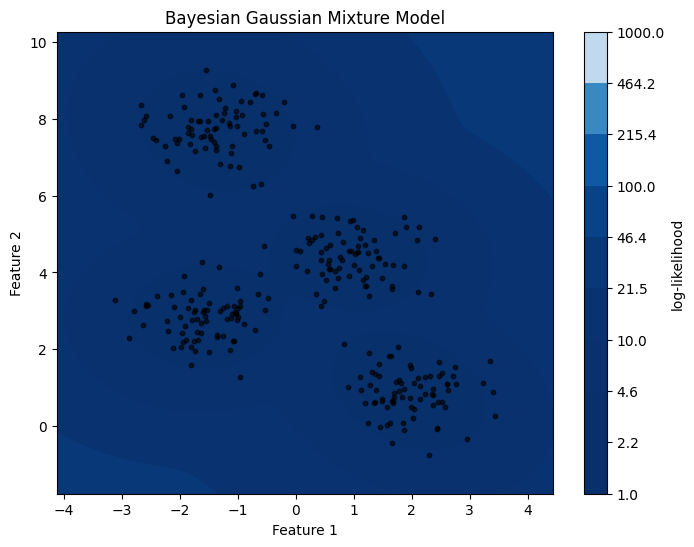

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import BayesianGaussianMixture

# Step 1: Generate Synthetic Dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Step 2: Implement Bayesian Gaussian Mixture Models
bgmm = BayesianGaussianMixture(n_components=10, max_iter=1000, random_state=0)
bgmm.fit(X)

# Step 3: Visualize the Clusters
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = -bgmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.logspace(0, 3, 10), cmap='Blues_r')
plt.colorbar(label='log-likelihood')
plt.scatter(X[:, 0], X[:, 1], s=10, color='black', alpha=0.6)
plt.title('Bayesian Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

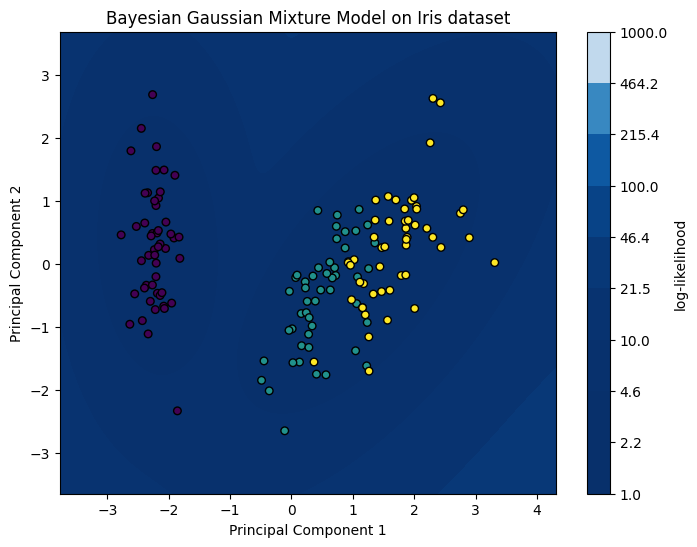

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Preprocess the data (scaling and dimensionality reduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Implement Bayesian Gaussian Mixture Models
bgmm = BayesianGaussianMixture(n_components=3, max_iter=1000, random_state=0)
bgmm.fit(X_pca)

# Step 4: Visualize the Clusters
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = -bgmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.logspace(0, 3, 10), cmap='Blues_r')
plt.colorbar(label='log-likelihood')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, cmap='viridis', edgecolors='k')
plt.title('Bayesian Gaussian Mixture Model on Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [4]:
np.round(bgmm.weights_, 3)

array([0.336, 0.662, 0.002])

# Bayesian deep learning.with PyTorch

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Create DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the neural network architecture with dropout
class BayesianNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BayesianNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(torch.unique(y_train_tensor))
model = BayesianNN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
model.train()
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss}")

# Switch to evaluation mode
model.eval()

# Predict probabilities for test set using Monte Carlo Dropout
mc_samples = 100
with torch.no_grad():
    predictions = torch.zeros(len(X_test_tensor), output_size)
    for _ in range(mc_samples):
        outputs = F.softmax(model(X_test_tensor), dim=1)
        predictions += outputs
    avg_predictions = predictions / mc_samples
    _, predicted_labels = torch.max(avg_predictions, 1)

# Calculate accuracy
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

correct = (predicted_labels == y_test_tensor).sum().item()
total = len(y_test_tensor)
accuracy = correct / total
print(f"Accuracy on test set: {accuracy}")


Epoch 1/100, Loss: 2.0788633227348328
Epoch 2/100, Loss: 2.0301294326782227
Epoch 3/100, Loss: 2.0013211965560913
Epoch 4/100, Loss: 1.9346524477005005
Epoch 5/100, Loss: 1.87529456615448
Epoch 6/100, Loss: 1.8631139397621155
Epoch 7/100, Loss: 1.810243546962738
Epoch 8/100, Loss: 1.750016450881958
Epoch 9/100, Loss: 1.6867814660072327
Epoch 10/100, Loss: 1.6787946820259094
Epoch 11/100, Loss: 1.633969008922577
Epoch 12/100, Loss: 1.5642111897468567
Epoch 13/100, Loss: 1.5130195617675781
Epoch 14/100, Loss: 1.542946994304657
Epoch 15/100, Loss: 1.4913945198059082
Epoch 16/100, Loss: 1.4273879528045654
Epoch 17/100, Loss: 1.4689567685127258
Epoch 18/100, Loss: 1.3734127283096313
Epoch 19/100, Loss: 1.3730595707893372
Epoch 20/100, Loss: 1.323637068271637
Epoch 21/100, Loss: 1.3462545275688171
Epoch 22/100, Loss: 1.3057159781455994
Epoch 23/100, Loss: 1.2758471965789795
Epoch 24/100, Loss: 1.2372992038726807
Epoch 25/100, Loss: 1.2625223398208618
Epoch 26/100, Loss: 1.2040290236473083
Ep

# Bayesian Gaussian Mixture Models for Anomaly Detection:

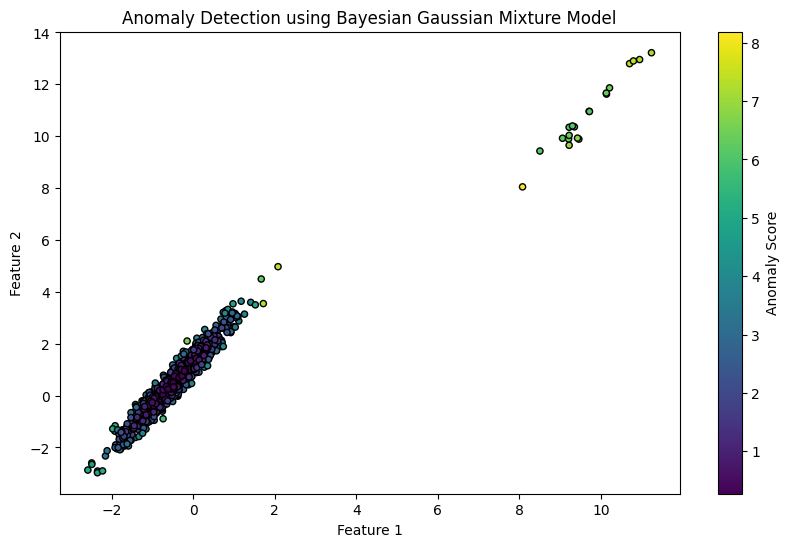

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.mixture import BayesianGaussianMixture

# Generate synthetic data with anomalies
X, _ = make_classification(n_samples=1000, n_features=2, n_classes=1, n_clusters_per_class=1, n_informative=2,
                           n_redundant=0, n_repeated=0, class_sep=0.5, flip_y=0.1, random_state=42)

# Add anomalies
np.random.seed(42)
X[:20] += 10  # Add anomalies to the first 20 data points

# Fit Bayesian Gaussian Mixture Model
bgmm = BayesianGaussianMixture(n_components=3, covariance_type='full', max_iter=1000, random_state=42)
bgmm.fit(X)

# Predict the anomaly scores
anomaly_scores = -bgmm.score_samples(X)

# Plot the data and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores, cmap='viridis', s=20, edgecolors='k')
plt.colorbar(label='Anomaly Score')
plt.title('Anomaly Detection using Bayesian Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#Other Anomaly Detection and Novelty Detection Algorithms

#Fast-MCD (minimum covariance determinant)

Method 1: MinCovDet

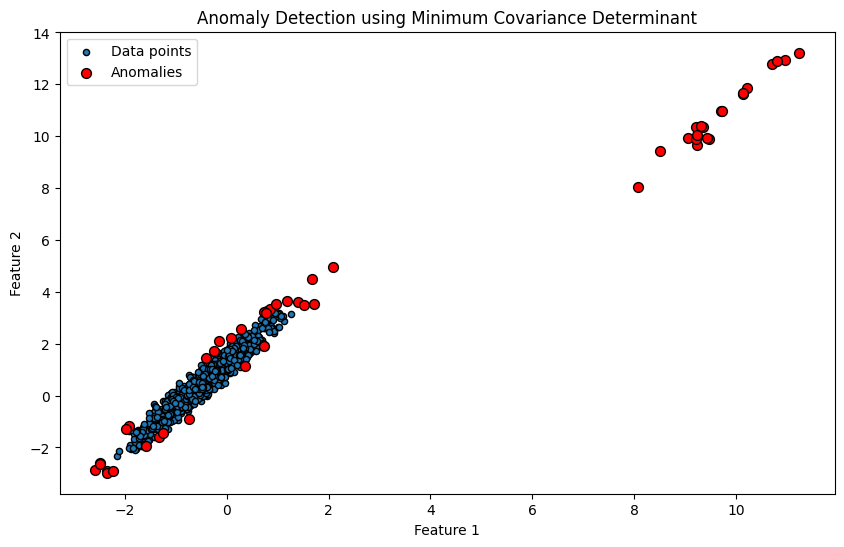

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.covariance import MinCovDet

# Generate synthetic data with anomalies
X, _ = make_classification(n_samples=1000, n_features=2, n_classes=1, n_clusters_per_class=1, n_informative=2,
                           n_redundant=0, n_repeated=0, class_sep=0.5, flip_y=0.1, random_state=42)

# Add anomalies
np.random.seed(42)
X[:20] += 10  # Add anomalies to the first 20 data points

# Fit Minimum Covariance Determinant
mcd = MinCovDet()
mcd.fit(X)

# Calculate Mahalanobis distances
mahalanobis_dists = mcd.mahalanobis(X)

# Set a threshold for anomaly detection
threshold = np.percentile(mahalanobis_dists, 95)  # Adjust the percentile as needed

# Identify anomalies
anomalies = X[mahalanobis_dists > threshold]

# Plot the data and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, label='Data points', edgecolors='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', s=50, label='Anomalies', edgecolors='k')
plt.title('Anomaly Detection using Minimum Covariance Determinant')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Method 2: EllipticEnvelope class

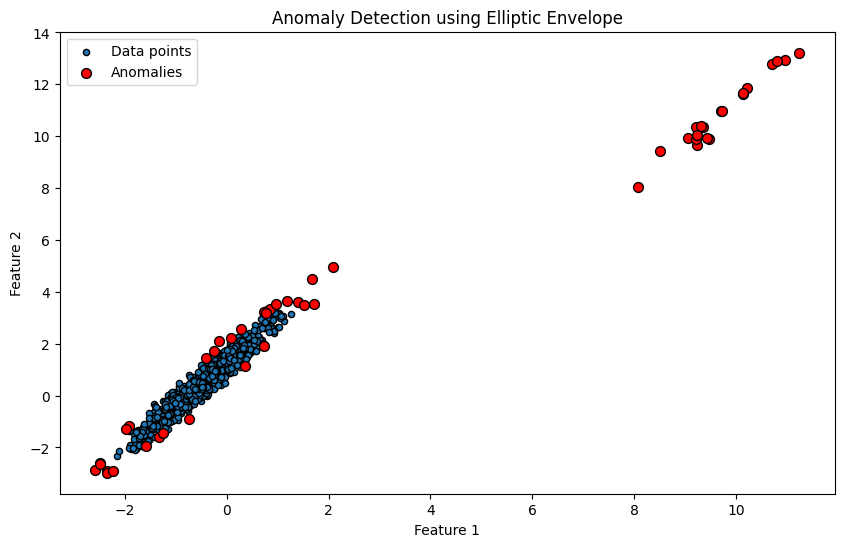

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.covariance import EllipticEnvelope

# Generate synthetic data with anomalies
X, _ = make_classification(n_samples=1000, n_features=2, n_classes=1, n_clusters_per_class=1, n_informative=2,
                           n_redundant=0, n_repeated=0, class_sep=0.5, flip_y=0.1, random_state=42)

# Add anomalies
np.random.seed(42)
X[:20] += 10  # Add anomalies to the first 20 data points

# Fit Elliptic Envelope
envelope = EllipticEnvelope(contamination=0.05)  # Specify the contamination parameter
envelope.fit(X)

# Predict anomaly labels
anomaly_labels = envelope.predict(X)

# Extract anomalies
anomalies = X[anomaly_labels == -1]

# Plot the data and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, label='Data points', edgecolors='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', s=50, label='Anomalies', edgecolors='k')
plt.title('Anomaly Detection using Elliptic Envelope')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Isolation Forest

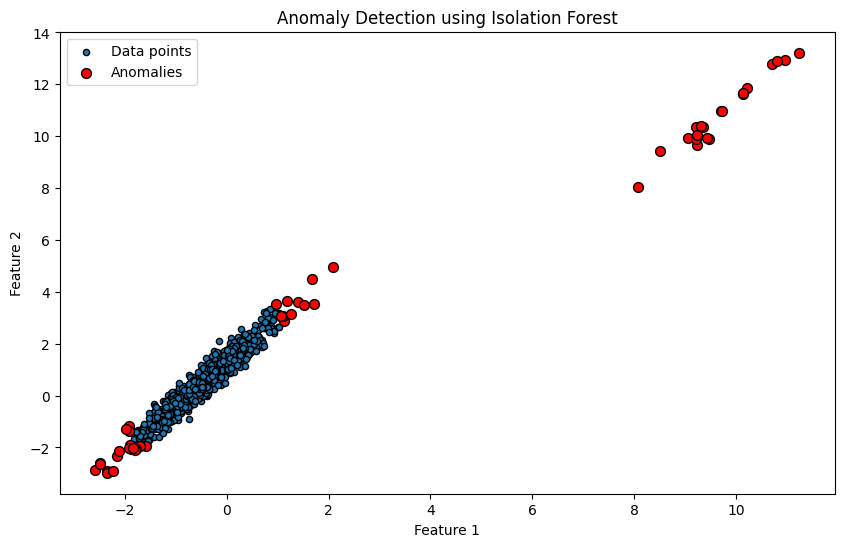

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest

# Generate synthetic data with anomalies
X, _ = make_classification(n_samples=1000, n_features=2, n_classes=1, n_clusters_per_class=1, n_informative=2,
                           n_redundant=0, n_repeated=0, class_sep=0.5, flip_y=0.1, random_state=42)

# Add anomalies
np.random.seed(42)
X[:20] += 10  # Add anomalies to the first 20 data points

# Fit Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)  # Specify the contamination parameter
isolation_forest.fit(X)

# Predict anomaly labels
anomaly_labels = isolation_forest.predict(X)

# Extract anomalies
anomalies = X[anomaly_labels == -1]

# Plot the data and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, label='Data points', edgecolors='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', s=50, label='Anomalies', edgecolors='k')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Local outlier factor (LOF)

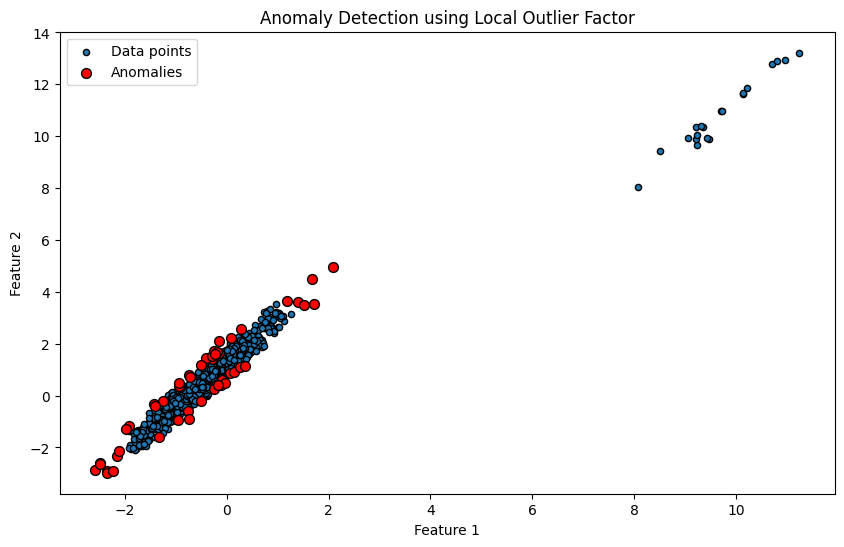

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic data with anomalies
X, _ = make_classification(n_samples=1000, n_features=2, n_classes=1, n_clusters_per_class=1, n_informative=2,
                           n_redundant=0, n_repeated=0, class_sep=0.5, flip_y=0.1, random_state=42)

# Add anomalies
np.random.seed(42)
X[:20] += 10  # Add anomalies to the first 20 data points

# Fit Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Specify the number of neighbors and contamination
anomaly_scores = lof.fit_predict(X)

# Extract anomalies
anomalies = X[anomaly_scores == -1]

# Plot the data and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, label='Data points', edgecolors='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', s=50, label='Anomalies', edgecolors='k')
plt.title('Anomaly Detection using Local Outlier Factor')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#One-class SVM

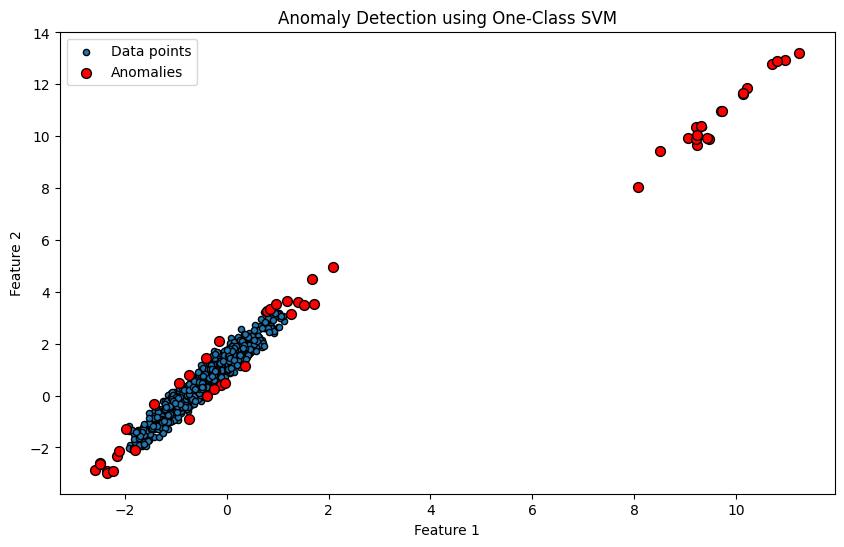

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import OneClassSVM

# Generate synthetic data with anomalies
X, _ = make_classification(n_samples=1000, n_features=2, n_classes=1, n_clusters_per_class=1, n_informative=2,
                           n_redundant=0, n_repeated=0, class_sep=0.5, flip_y=0.1, random_state=42)

# Add anomalies
np.random.seed(42)
X[:20] += 10  # Add anomalies to the first 20 data points

# Fit One-Class SVM
svm = OneClassSVM(nu=0.05)  # Specify the parameter nu (an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors)
svm.fit(X)

# Predict if the samples are inliers or outliers
anomaly_labels = svm.predict(X)

# Extract anomalies
anomalies = X[anomaly_labels == -1]

# Plot the data and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, label='Data points', edgecolors='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', s=50, label='Anomalies', edgecolors='k')
plt.title('Anomaly Detection using One-Class SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Perceptron for classification

Accuracy: 0.6333333333333333


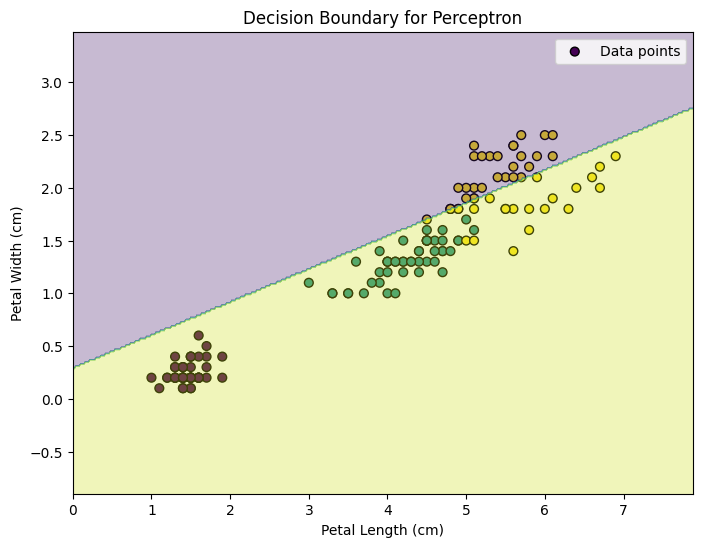

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)

# Train the Perceptron model
perceptron.fit(X_train, y_train)

# Predict labels for test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot decision boundary for last two features (Petal Length and Petal Width)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', edgecolors='k', s=40, label='Data points')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Plot decision boundary
x_min, x_max = X[:, 2].min() - 1, X[:, 2].max() + 1
y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title('Decision Boundary for Perceptron')
plt.legend()
plt.show()
